## Plot results and compare with Noah

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


POROSITY = {
    'clay': 0.468,
    'sand': 0.339,
}
PSI_SAT = {
    'clay': 0.37,
    'sand': 0.07,
}
K_SAT = {
    'clay': 1.7E-7,
    'sand': 5.8E-5,
}
B = {
    'clay': 7.6,
    'sand': 1.7,
}

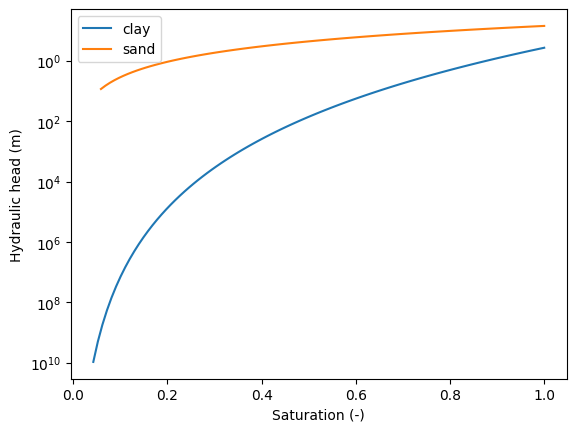

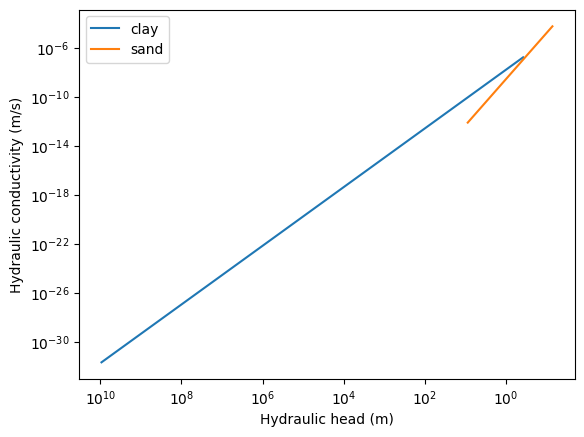

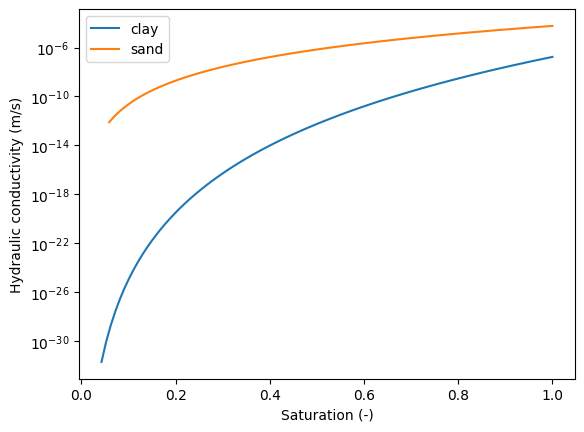

In [14]:
def hydraulic_conductivity(k_sat, psi_sat, b, psi):
    return k_sat * ((psi / psi_sat) ** (-(2 * b + 3) / b))

def psi(psi_sat, theta_sat, b, theta):
    return psi_sat * ((theta / theta_sat) ** b)


fig, ax = plt.subplots()
for soil_type in ['clay', 'sand']:
    theta_values = np.linspace(0.02, POROSITY[soil_type], 100)
    psi_values = PSI_SAT[soil_type] * (theta_values / POROSITY[soil_type]) ** (-B[soil_type])
    ax.plot(theta_values / POROSITY[soil_type], psi_values, label=soil_type)

ax.set_yscale('log')
ax.invert_yaxis()
ax.set_xlabel('Saturation (-)')
ax.set_ylabel('Hydraulic head (m)')
ax.legend()

fig, ax = plt.subplots()
for soil_type in ['clay', 'sand']:
    theta_values = np.linspace(0.02, POROSITY[soil_type], 100)
    psi_values = PSI_SAT[soil_type] * (theta_values / POROSITY[soil_type]) ** (-B[soil_type])
    k_values = hydraulic_conductivity(K_SAT[soil_type], PSI_SAT[soil_type], B[soil_type], psi_values)

    ax.plot(psi_values, k_values, label=soil_type)

ax.set_xlabel('Hydraulic head (m)')
ax.set_ylabel('Hydraulic conductivity (m/s)')
ax.invert_xaxis()
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()


fig, ax = plt.subplots()
for soil_type in ['clay', 'sand']:
    theta_values = np.linspace(0.02, POROSITY[soil_type], 100)
    psi_values = PSI_SAT[soil_type] * (theta_values / POROSITY[soil_type]) ** (-B[soil_type])
    k_values = hydraulic_conductivity(K_SAT[soil_type], PSI_SAT[soil_type], B[soil_type], psi_values)

    ax.plot(theta_values / POROSITY[soil_type], k_values, label=soil_type)

ax.set_xlabel('Saturation (-)')
ax.set_ylabel('Hydraulic conductivity (m/s)')
ax.set_yscale('log')
ax.legend()


/var/folders/vl/cg0s8ltd5h724vq3k_66g91m0000gn/T/ipykernel_17749/4072190444.py:61: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


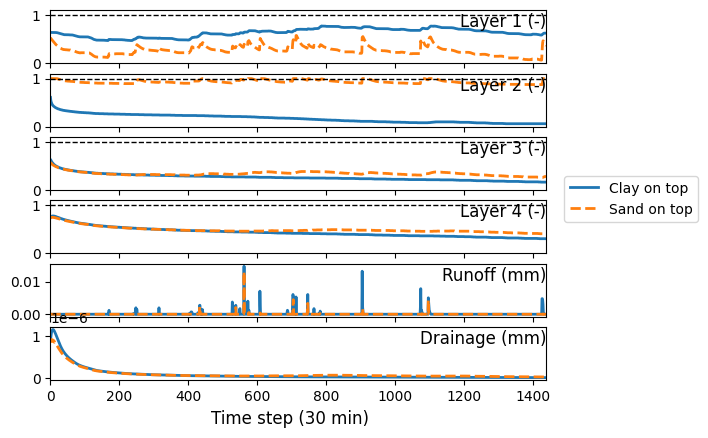

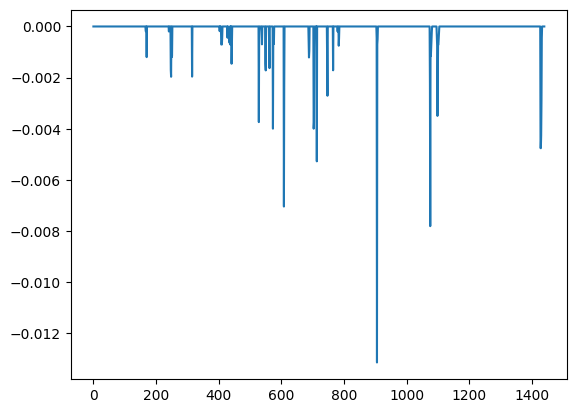

In [18]:

zsoil = [-0.1, -0.4, -1.0, -2.0]
clay_sand_df = pd.read_csv(
    'cycles_clay_sand.txt',
)
clay_sand_df['smc0'] = clay_sand_df['smc0'] / POROSITY['clay']
clay_sand_df['smc1'] = clay_sand_df['smc1'] / POROSITY['sand']
clay_sand_df['smc2'] = clay_sand_df['smc2'] / POROSITY['sand']
clay_sand_df['smc3'] = clay_sand_df['smc3'] / POROSITY['sand']

sand_clay_df = pd.read_csv(
    'cycles_sand_clay.txt',
)
sand_clay_df['smc0'] = sand_clay_df['smc0'] / POROSITY['sand']
sand_clay_df['smc1'] = sand_clay_df['smc1'] / POROSITY['clay']
sand_clay_df['smc2'] = sand_clay_df['smc2'] / POROSITY['sand']
sand_clay_df['smc3'] = sand_clay_df['smc3'] / POROSITY['sand']

fig, axs = plt.subplots(
    6, 1,
    sharex=True,
    #sharey=True,
)
vars = {
    'smc0': 'Layer 1 (-)',
    'smc1': 'Layer 2 (-)',
    'smc2': 'Layer 3 (-)',
    'smc3': 'Layer 4 (-)',
    #'smc0': 'Layer 1 (m$^3$ m$^{-3}$)',
    #'smc1': 'Layer 2 (m$^3$ m$^{-3}$)',
    #'smc2': 'Layer 3 (m$^3$ m$^{-3}$)',
    #'smc3': 'Layer 4 (m$^3$ m$^{-3}$)',
    'runoff': 'Runoff (mm)',
    'drainage': 'Drainage (mm)',
}

for k, v in enumerate(vars):
    axs[k].plot(
        clay_sand_df[v],
        lw=2,
        label=f'Clay on top',
    )
    axs[k].plot(
        sand_clay_df[v],
        '--',
        lw=2,
        label=f'Sand on top',
    )
    axs[k].set_title(
        vars[v],
        loc='right',
        y=1.0, pad=-12
    )
    if k < 4:
        axs[k].plot([0, 1440], [1, 1], 'k--', lw=1)
        axs[k].set_ylim(0, 1.1)

axs[0].set_xlim(0, 1440)
plt.legend(bbox_to_anchor=(1.32, 4))
fig.supxlabel('Time step (30 min)')
#fig.supylabel('Soil moisture content (m$^3$ m$^{-3}$)')
fig.tight_layout()

fig, ax = plt.subplots()
ax.plot(sand_clay_df['runoff'] - clay_sand_df['runoff'])

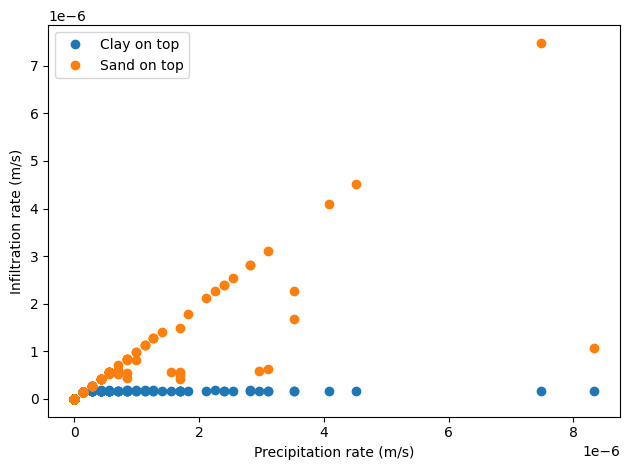

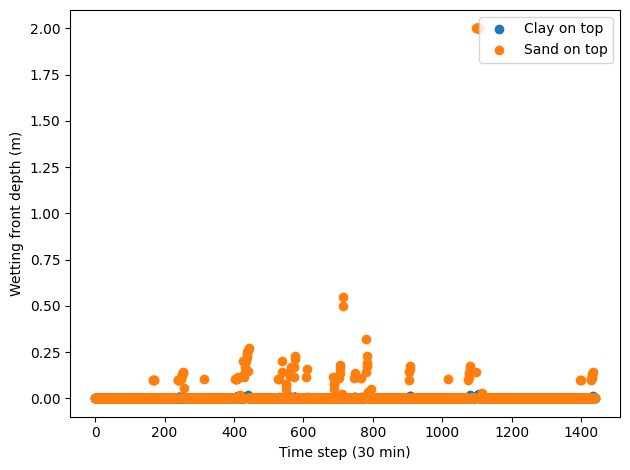

In [16]:
fig, ax = plt.subplots()
ax.plot(clay_sand_df['prcp'], clay_sand_df['infil'], 'o', label='Clay on top')
ax.plot(sand_clay_df['prcp'], sand_clay_df['infil'], 'o', label='Sand on top')
ax.set_ylabel('Infiltration rate (m/s)')
ax.set_xlabel('Precipitation rate (m/s)')
ax.legend()
fig.tight_layout()

fig, ax = plt.subplots()
sand_clay_df.loc[sand_clay_df['wf'] > 2.0, 'wf'] = 2.0
clay_sand_df.loc[clay_sand_df['wf'] > 2.0, 'wf'] = 2.0
ax.plot(clay_sand_df['wf'], 'o', label='Clay on top')
ax.plot(sand_clay_df['wf'], 'o', label='Sand on top')
ax.set_xlabel('Time step (30 min)')
ax.set_ylabel('Wetting front depth (m)')
ax.legend()
fig.tight_layout()